#DRE0065 - ZSU PROJECT

##Credit Card Customers


# Exploratory Data Analysis (EDA)

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

In [250]:
df = pd.read_csv('/content/BankChurners.csv', na_values=['NULL'])
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [252]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [253]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [254]:
df['Attrition_Flag'].value_counts(normalize=True)

,proportion
Attrition_Flag,
Existing Customer,0.83934
Attrited Customer,0.16066


### Graf 1: Rozložení zákazníků podle stavu
- Drtivá většina zákazníků (přes 8 000) je stále aktivní (`Existing Customer`).
- Pouze malá část zákazníků (přibližně 1 600) ukončila svůj účet (`Attrited Customer`).
- **Hypotéza:** Zákazníci, kteří zůstávají, mají pravděpodobně přístup k benefitům nebo službám, které je motivují zůstat.

### Graf 2: Rozložení zákazníků podle vzdělání
- Největší část zákazníků má vzdělání na úrovni **Graduate** (přes 3 000), následuje **High School** a neznámá kategorie (`Unknown`).
- Kategorie jako **Doctorate** a **Post-Graduate** jsou zastoupeny minimálně.
- **Hypotéza:** Banka může cílit své služby více na vysokoškolsky vzdělané zákazníky, kteří mají tendenci více využívat finanční produkty.

### Graf 3: Průměrný kreditní limit podle příjmové kategorie
- Nejvyšší kreditní limity mají zákazníci s příjmy nad **120 000** USD.
- Zákazníci s nižšími příjmy (pod 40 000 USD) mají znatelně nižší kreditní limity.
- Kategorie `Unknown` vykazuje poměrně vysoký průměrný kreditní limit.
- **Hypotéza:** Kreditní limity jsou přidělovány přímo na základě deklarovaného příjmu zákazníka. Skupina `Unknown` může zahrnovat dlouhodobé zákazníky, u kterých byla příjmová historie vyhodnocena jinými metodami.


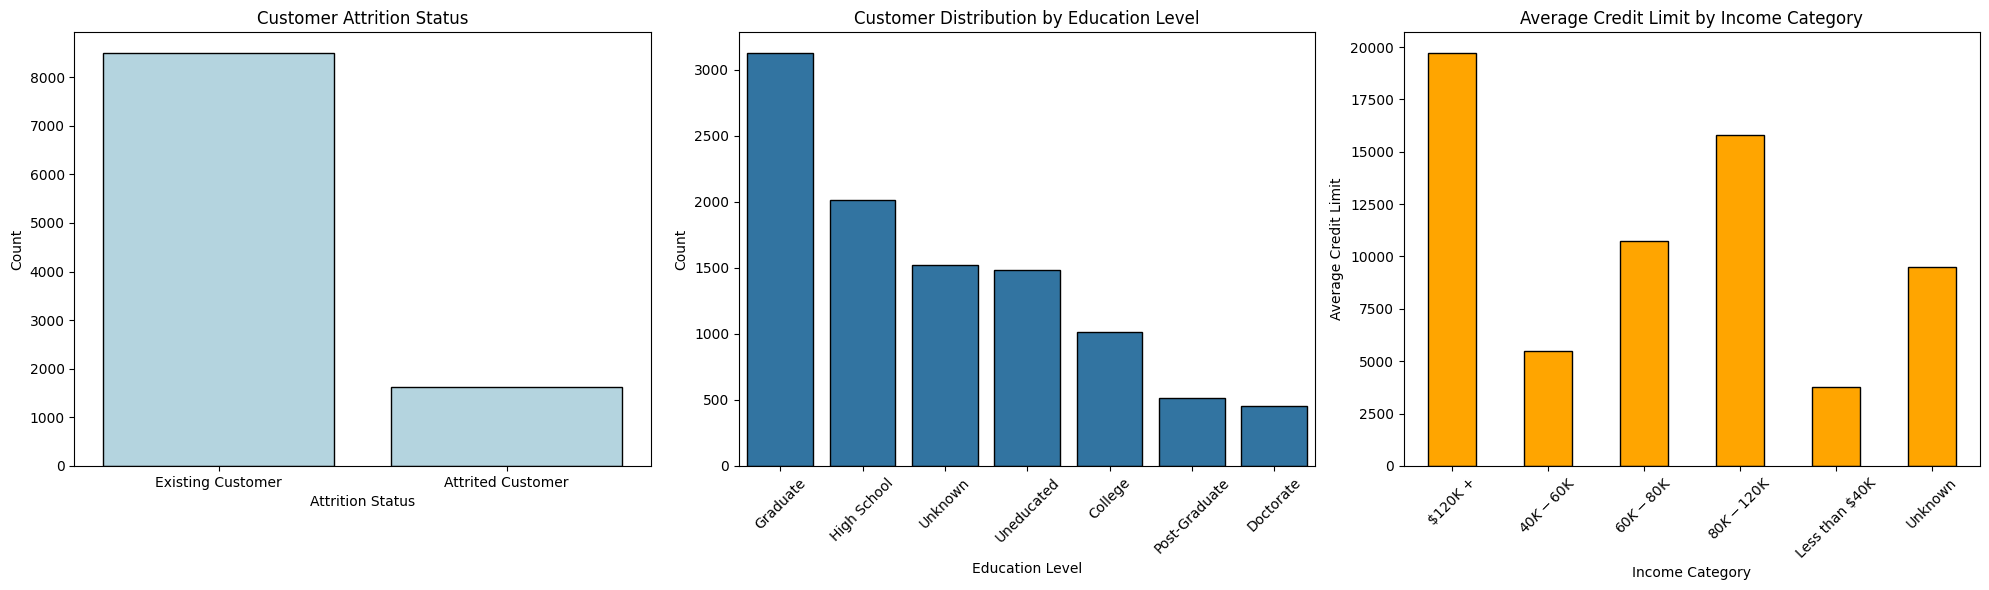

In [255]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df, x='Attrition_Flag', ax=ax[0], edgecolor='black', color='lightblue')
ax[0].set_title("Customer Attrition Status")
ax[0].set_xlabel("Attrition Status")
ax[0].set_ylabel("Count")

sns.countplot(data=df, x='Education_Level', order=df['Education_Level'].value_counts().index, ax=ax[1], edgecolor='black')
ax[1].set_title("Customer Distribution by Education Level")
ax[1].set_xlabel("Education Level")
ax[1].set_ylabel("Count")
ax[1].tick_params(axis='x', rotation=45)

bars = df.groupby('Income_Category')['Credit_Limit'].mean().plot(kind='bar', ax=ax[2], color='orange', edgecolor='black')
ax[2].set_title("Average Credit Limit by Income Category")
ax[2].set_xlabel("Income Category")
ax[2].set_ylabel("Average Credit Limit")
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Graf 1: Rozložení věku zákazníků
- Největší skupina zákazníků spadá do věkového rozmezí **40–60 let**, s vrcholem okolo 50 let.
- Mladší zákazníci (pod 30 let) a starší zákazníci (nad 60 let) jsou méně zastoupeni.
- Rozložení věku je přibližně normální s mírnou špičkou ve středním věku.
- **Hypotéza:** Banka přitahuje zákazníky středního věku, kteří jsou finančně aktivní a mají stabilní příjmy.

### Graf 2: Rozložení počtu transakcí
- Největší počet zákazníků provádí **40–80 transakcí ročně**, s vrcholem okolo 60–80 transakcí.
- Zákazníci s méně než 20 nebo více než 100 transakcemi jsou vzácní.
- Rozložení ukazuje, že většina zákazníků vykazuje střední úroveň aktivity.
- **Hypotéza:** Zákazníci s vyšší aktivitou (více než 80 transakcí) mohou být cílem pro věrnostní programy, zatímco zákazníci s nízkou aktivitou (méně než 20 transakcí) mohou být ohroženi odchodem.

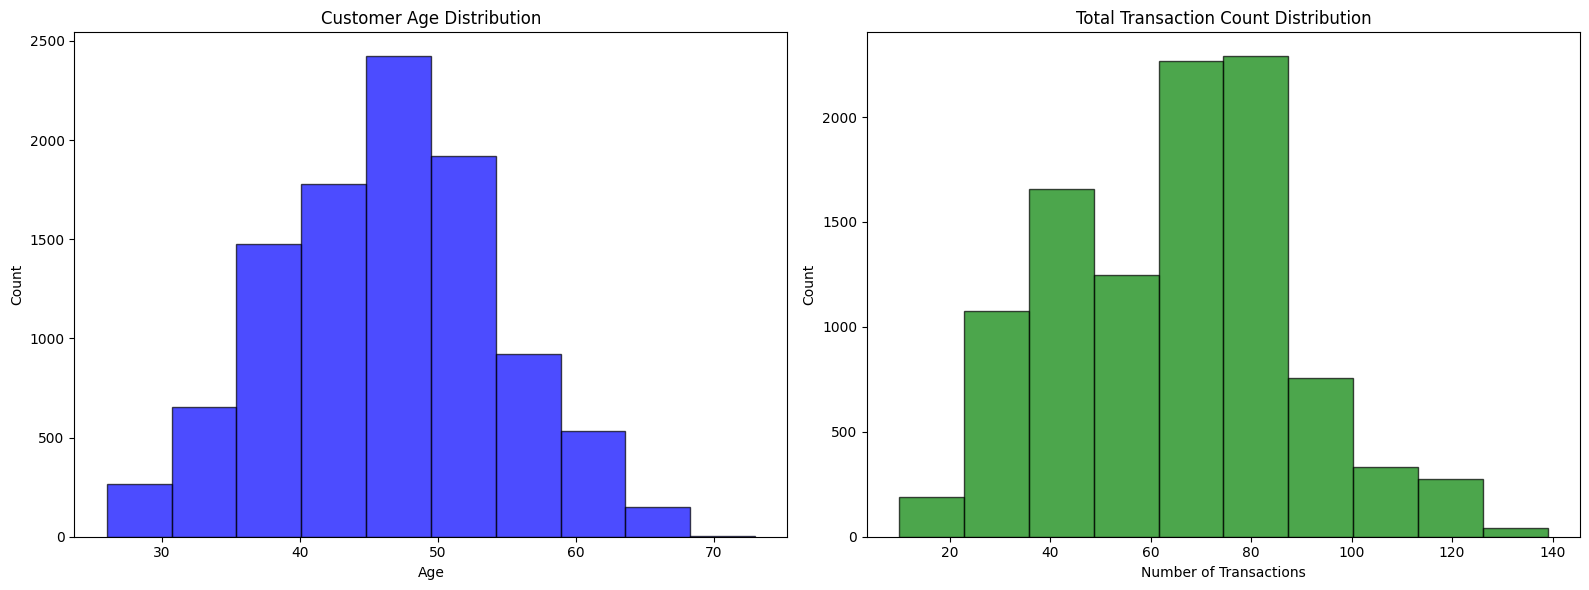

In [256]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].hist(df['Customer_Age'], bins=10, color='blue', alpha=0.7, edgecolor='black')
ax[0].set_title("Customer Age Distribution")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")

ax[1].hist(df['Total_Trans_Ct'], bins=10, color='green', alpha=0.7, edgecolor='black')
ax[1].set_title("Total Transaction Count Distribution")
ax[1].set_xlabel("Number of Transactions")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Graf 1: Rozložení zákazníků podle pohlaví
- Zákazníci jsou rovnoměrně rozděleni mezi pohlaví:
  - **52,9 % tvoří ženy (Female, F).**
  - **47,1 % tvoří muži (Male, M).**
- **Hypotéza:** Rovnoměrné rozložení naznačuje, že služby banky nejsou orientovány na konkrétní pohlaví, ale spíše na univerzální přístup k zákazníkům.

### Graf 2: Rozložení zákazníků podle typu karty
- Drtivá většina zákazníků (**93,2 %**) používá **modrou kartu (Blue)**.
- Ostatní typy karet (Silver, Gold, Platinum) tvoří pouze malé procento zákazníků:
  - **Silver: 5,5 %.**
  - **Gold: 1,1 %.**
  - **Platinum: 0,2 %.**
- **Hypotéza:** Modrá karta (Blue) může být standardním produktem banky s minimálními náklady, zatímco prémiové karty (Gold, Platinum) jsou orientované na úzkou skupinu VIP zákazníků.


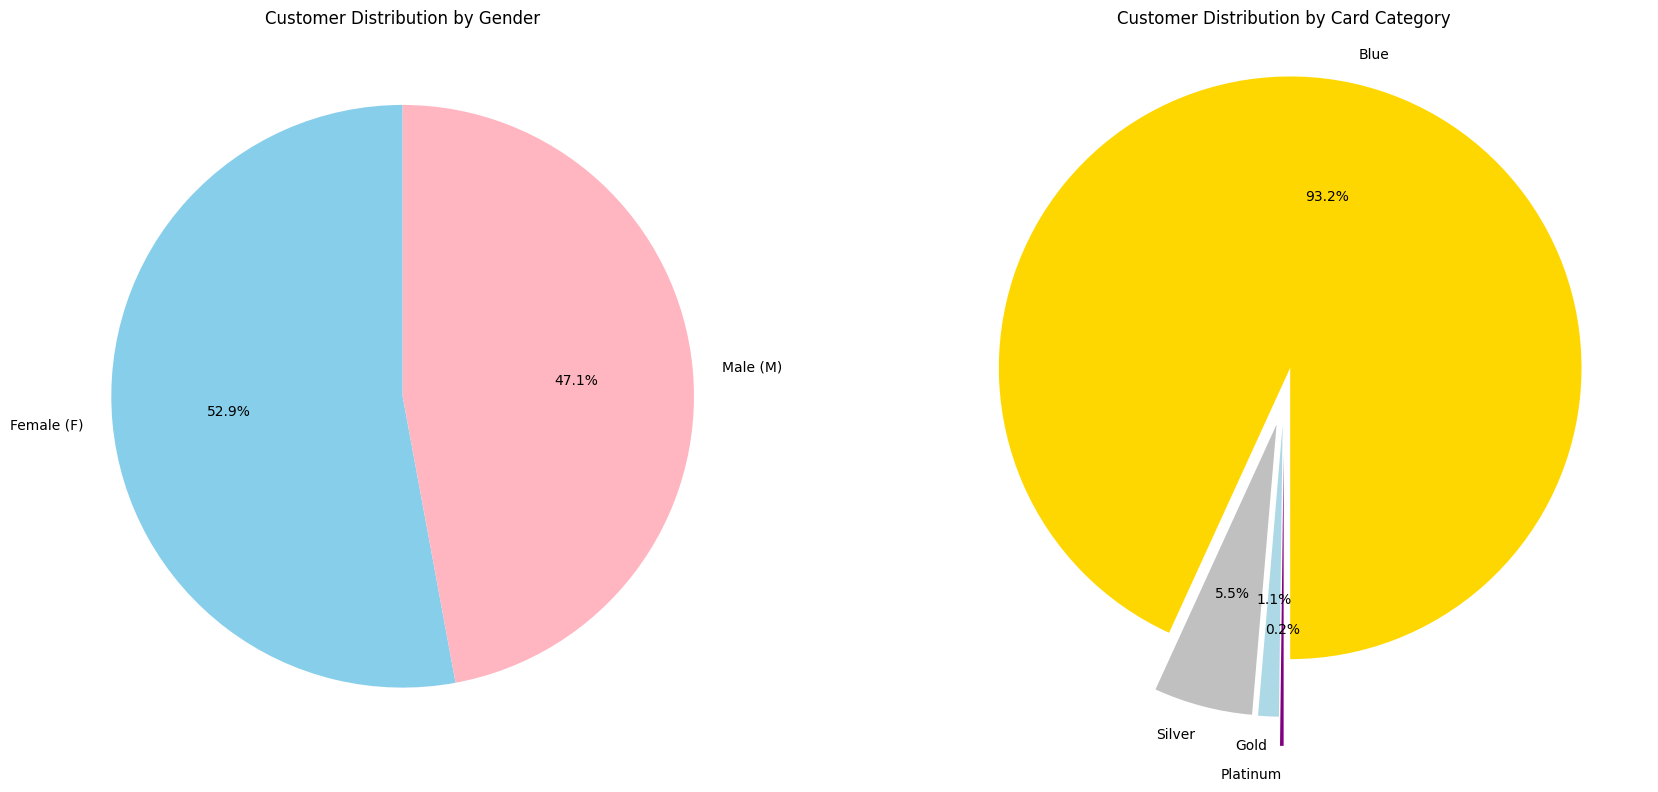

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'], labels=['Female (F)', 'Male (M)'], ax=ax[0])
ax[0].set_title("Customer Distribution by Gender")
ax[0].set_ylabel("")

explode = (0.1, 0.1, 0.1, 0.2)
df['Card_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, colors=['gold', 'silver', 'lightblue', 'purple'], explode=explode, ax=ax[1])
ax[1].set_title("Customer Distribution by Card Category")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()

### Graf 1: Věk vs. Počet transakcí
- Zákazníci ve věkovém rozmezí **30–70 let** vykazují široký rozsah počtu transakcí.
- Aktivní zákazníci (Existing Customer) mají tendenci provádět více transakcí než zákazníci, kteří účet opustili (Attrited Customer).
- U starších zákazníků (nad 60 let) je počet transakcí nižší.
- **Hypotéza:** Zákazníci středního věku jsou pravděpodobně více finančně aktivní, což se odráží ve vyšším počtu transakcí.


### Graf 2: Kreditní limit vs. Utilizace
- Zákazníci s nižšími kreditními limity mají obecně vyšší míru utilizace.
- Aktivní zákazníci (Existing Customer) mají širší rozsah utilizace oproti těm, kteří opustili účet (Attrited Customer).
- Existují zákazníci s velmi vysokými kreditními limity (nad 30 000), ale jejich utilizace je nízká.
- **Hypotéza:** Zákazníci s vyššími limity mají nižší utilizaci díky lepším finančním možnostem, zatímco zákazníci s nízkými limity mohou využívat větší procento svého dostupného kreditu.


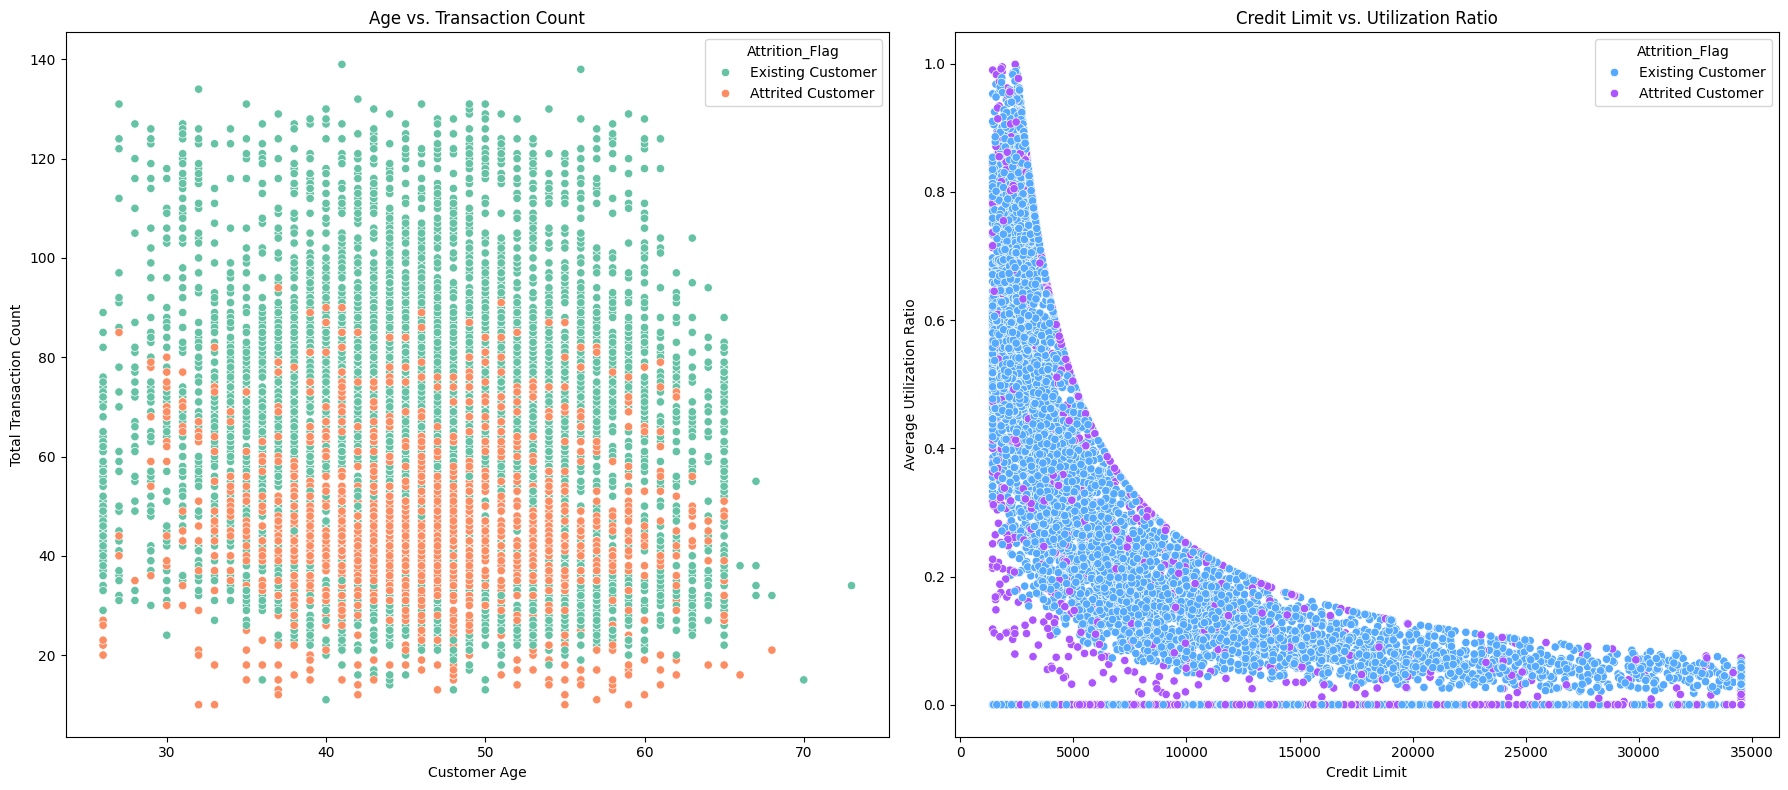

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df, x='Customer_Age', y='Total_Trans_Ct', hue='Attrition_Flag', palette='Set2', ax=ax[0])
ax[0].set_title("Age vs. Transaction Count")
ax[0].set_xlabel("Customer Age")
ax[0].set_ylabel("Total Transaction Count")

sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette='cool', ax=ax[1])
ax[1].set_title("Credit Limit vs. Utilization Ratio")
ax[1].set_xlabel("Credit Limit")
ax[1].set_ylabel("Average Utilization Ratio")

plt.tight_layout()
plt.show()

### Graf 1: Kreditní limit podle stavu zákazníka
- Aktivní zákazníci (Existing Customer) mají obecně vyšší kreditní limity než zákazníci, kteří opustili účet (Attrited Customer).
- Medián kreditního limitu je vyšší u aktivních zákazníků, přičemž rozložení obsahuje odlehlé hodnoty nad 30 000.
- **Hypotéza:** Aktivní zákazníci mohou mít delší historii s bankou, což vede k vyšším kreditním limitům, zatímco u opuštěných účtů může být limit nižší kvůli nižší aktivitě nebo rizikovým profilům.

### Graf 2: Počet transakcí podle příjmové kategorie
- Medián počtu transakcí (čára v boxu) je velmi podobný napříč všemi příjmovými kategoriemi, pohybuje se kolem **60–70 transakcí** ročně.
- Rozsah (rozptyl) transakcí je také podobný u všech kategorií, přičemž několik odlehlých hodnot (outliers) indikuje zákazníky s počtem transakcí nad **100**.
- Kategorie `Unknown` nevykazuje žádné výrazné odlišnosti od ostatních kategorií.
- **Hypotéza:** Příjem zákazníka nemá významný vliv na počet transakcí – jiné faktory, jako je věk, vzdělání nebo loajalita, mohou hrát větší roli.



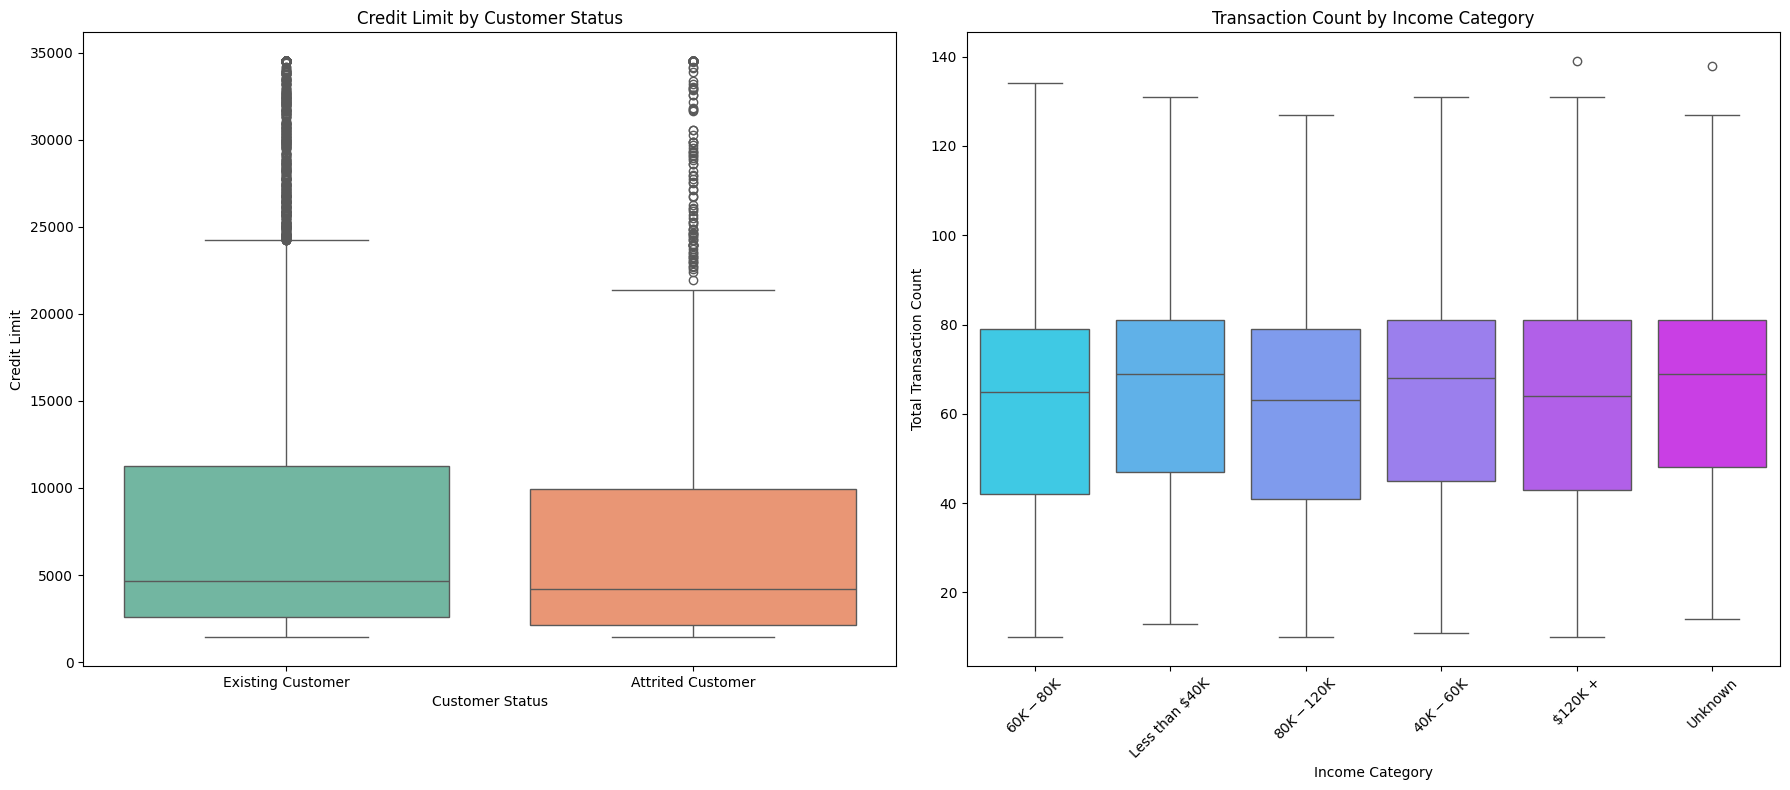

In [259]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit', hue='Attrition_Flag', palette='Set2', ax=ax[0])
ax[0].set_title("Credit Limit by Customer Status")
ax[0].set_xlabel("Customer Status")
ax[0].set_ylabel("Credit Limit")
ax[0].legend([],[], frameon=False)

sns.boxplot(data=df, x='Income_Category', y='Total_Trans_Ct', hue='Income_Category', palette='cool', ax=ax[1])
ax[1].set_title("Transaction Count by Income Category")
ax[1].set_xlabel("Income Category")
ax[1].set_ylabel("Total Transaction Count")
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend([],[], frameon=False)

plt.tight_layout()
plt.show()

## Závěr

Po důkladné analýze grafů a dat můžeme shrnout následující závěry:

1. **Rozložení zákazníků podle stavu:**
   - Většina zákazníků zůstává aktivní, což naznačuje, že služby banky jsou atraktivní pro dlouhodobé zákazníky.
   - Malý podíl zákazníků ukončuje své účty, což může být důsledkem nedostatečného zájmu o věrnostní programy nebo konkurenčních nabídek.

2. **Vzdělání zákazníků:**
   - Nejvíce zákazníků má vysokoškolské vzdělání, což naznačuje, že banka cílí na vzdělané klienty, kteří mají tendenci využívat sofistikovanější finanční produkty.
   - Nízké zastoupení zákazníků s nejvyšším dosaženým vzděláním (Doctorate) může ukazovat na omezený zájem této skupiny o nabízené produkty.

3. **Příjmové kategorie a kreditní limity:**
   - Vyšší příjmové kategorie mají vyšší kreditní limity, což je očekávané, protože příjmy korelují se schopností splácet.
   - Kategorie `Unknown` vykazuje také vysoké kreditní limity, což může být důsledkem historických dat nebo delší doby spolupráce s bankou.

4. **Věkové rozložení zákazníků:**
   - Zákazníci ve věku 40–60 let jsou nejvíce zastoupeni, což naznačuje, že banka přitahuje ekonomicky aktivní skupinu.
   - Mladší a starší zákazníci jsou méně aktivní, což může být způsobeno různými finančními prioritami nebo potřebami.

5. **Transakční aktivita:**
   - Většina zákazníků provádí 40–80 transakcí ročně, což ukazuje na střední úroveň aktivity.
   - Banka by mohla cílit věrnostní programy na zákazníky s vysokou aktivitou a současně stimulovat méně aktivní zákazníky k vyšší participaci.

6. **Kreditní limit a využití (utilizace):**
   - Zákazníci s vyššími limity mají tendenci využívat menší část svého dostupného kreditu, což svědčí o lepších finančních možnostech.
   - U zákazníků s nižšími limity je často vidět vyšší využití, což může být indikátor finanční tísně nebo nižší bonity.

7. **Rozdělení podle pohlaví:**
   - Banka má rovnoměrné zastoupení mužů a žen, což ukazuje na univerzálnost nabízených služeb bez výrazné orientace na konkrétní pohlaví.

8. **Počet transakcí podle příjmové kategorie:**
   - Rozsah a medián transakcí je podobný napříč kategoriemi, což naznačuje, že příjem není klíčovým faktorem ovlivňujícím počet transakcí.

### Doporučení:
- Banka by měla pokračovat v posilování atraktivity pro vzdělané a ekonomicky aktivní skupiny.
- Věrnostní programy mohou cílit na středně aktivní zákazníky, aby zvýšily jejich zapojení.
- Detailní analýza příčin odchodů zákazníků může pomoci snížit jejich počet.
- Nabídka specifických produktů pro zákazníky s nižšími příjmy a mladší věkovou skupinou by mohla rozšířit klientskou základnu.


# Preprocessing Pipeline

### Kroky předzpracování
1. **Numerické atributy:**
   - Atributy: `Customer_Age`, `Dependent_count`, `Months_on_book`, atd.
   - Použité techniky:
     - **Min-Max Scaling:** Škálování hodnot mezi 0 a 1.
     - **Standard Scaling:** Normalizace dat na základě průměru a směrodatné odchylky (pro experiment).
2. **Kategorické atributy:**
   - Atributy: `Gender`, `Education_Level`, `Marital_Status`, atd.
   - Použitá technika:
     - **One-Hot Encoding:** Převod kategorií na binární reprezentace.

3. **Odstranění nepotřebných sloupců:**
   - Sloupce `CLIENTNUM` a dva poslední sloupce byly odstraněny, protože nenesou relevantní informace.

## Metriky modelu
- **Použité metriky:**
  - **Accuracy:** Celková přesnost modelu.
  - **Precision:** Důležité pro minimalizaci falešných pozitiv.
  - **Recall:** Kritické pro zachycení co největšího počtu pozitivních případů.
  - **F1-Score:** Klíčová metrika pro nevyvážené třídy.
  
- **Nejdůležitější metrika:**
  - **F1-Score** bylo zvoleno jako hlavní metrika, protože vyvažuje přesnost (Precision) a citlivost (Recall), což je zásadní při řešení problému nevyvážených tříd.


In [260]:
target = 'Attrition_Flag'
X = df.drop(columns=[target])
y = df[target]

numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

numeric_transformer = Pipeline(steps=[('scaler_minmax', MinMaxScaler()), ('scaler_standard', StandardScaler())])
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Existing Customer')
recall = recall_score(y_test, y_pred, pos_label='Existing Customer')
f1 = f1_score(y_test, y_pred, pos_label='Existing Customer')
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Comparison of Classification Algorithms, k-Fold and Hyper-Parameters Tuning
## Použití standardní nebo stratifikované verze
Pro křížovou validaci byla použita **stratifikovaná verze** (Stratified k-Fold). Tento přístup byl zvolen, protože zajišťuje rovnoměrné zastoupení tříd cílové proměnné (target variable) ve všech podmnožinách, což je důležité zejména v případě, kdy data nejsou rovnoměrně rozložena mezi třídy. Tímto způsobem je možné získat přesnější výsledky a vyhnout se zkreslení v důsledku nerovnováhy dat.

## Vliv parametrů na výkon modelu a hodnocení výsledků
**Shrnutí výchozích hodnot:**
- Random Forest dosáhl nejvyšší přesnosti (Accuracy), Recall i hodnoty F1-Score, což ukazuje na jeho schopnost dobře generalizovat při výchozích parametrech.
- k-Nearest Neighbors měl nižší přesnost, ale stále dosahoval dobrého skóre Recall, což naznačuje, že je vhodný pro aplikace, kde je důležité minimalizovat ztracené pozitivní případy.
- Decision Tree a MLPClassifier měly podobný výkon, ale rozdíly v přesnosti a F1-Score nebyly výrazné.

**Shrnutí výsledků po ladění:**
- **Decision Tree** mírně ztratil na přesnosti, ale udržel stabilní hodnoty Recall a Precision. Přínos parametrů `max_depth` a `min_samples_split` byl patrný ve zlepšení balancování modelu.
- **Random Forest** dosáhl výjimečně vysokého Recall, což naznačuje, že po ladění model lépe rozpoznával pozitivní případy. Nicméně přesnost klesla, což může znamenat zvýšené množství falešně pozitivních.
- **k-Nearest Neighbors** si udržel solidní výkon s parametry `n_neighbors` a `weights`. Výsledky ukazují vyváženost mezi Recall a Precision.
- **MLPClassifier** měl stabilně nejlepší výkon po ladění s hodnotami F1-Score a Precision. Parametry `hidden_layer_sizes` a `learning_rate_init` hrály klíčovou roli ve zlepšení.

## Závěr
Parametry měly různý vliv na modely:
1. **Decision Tree** ukázal nejstabilnější výkon s jednoduchými pravidly pro větvení.
2. **Random Forest** dosáhl vysokého Recall, což je vhodné pro úlohy, kde je kritické rozpoznat všechny pozitivní případy.
3. **k-Nearest Neighbors** poskytl dobrý výkon díky parametrům `weights` a `metric`, ale může být citlivý na výběr sousedů.
4. **MLPClassifier** měl nejlepší výsledky po ladění díky flexibilitě neuronových sítí a správnému nastavení parametrů.

In [261]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="One or more of the test scores are non-finite")

results_normal = []
results_tuning = []

def evaluate_model(name, model):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    metrics = {'Algorithm': name, 'Parameters': 'Default', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred, pos_label='Existing Customer'), 'Recall': recall_score(y_test, y_pred, pos_label='Existing Customer'), 'F1-Score': f1_score(y_test, y_pred, pos_label='Existing Customer')}
    results_normal.append(metrics)

def evaluate_model_with_tuning(name, model, param_grid):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    metrics = {'Algorithm': name, 'Parameters': grid_search.best_params_, 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred, pos_label='Existing Customer'), 'Recall': recall_score(y_test, y_pred, pos_label='Existing Customer'), 'F1-Score': f1_score(y_test, y_pred, pos_label='Existing Customer')}
    results_tuning.append(metrics)

evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42))
evaluate_model("Random Forest", RandomForestClassifier(random_state=42))
evaluate_model("k-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
evaluate_model("MLPClassifier", MLPClassifier(max_iter=2000, random_state=42))

dt_param_grid = {'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5], 'classifier__criterion': ['gini', 'entropy']}
evaluate_model_with_tuning("Decision Tree", DecisionTreeClassifier(random_state=42), dt_param_grid)

rf_param_grid = {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [5, 10], 'classifier__min_samples_split': [2], 'classifier__bootstrap': [True, False]}
evaluate_model_with_tuning("Random Forest", RandomForestClassifier(random_state=42), rf_param_grid)

knn_param_grid = {'classifier__n_neighbors': [3, 5, 10], 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['minkowski']}
evaluate_model_with_tuning("k-Nearest Neighbors", KNeighborsClassifier(), knn_param_grid)

mlp_param_grid = {'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'classifier__activation': ['relu', 'tanh'], 'classifier__learning_rate_init': [0.001, 0.01]}
evaluate_model_with_tuning("MLPClassifier", MLPClassifier(max_iter=2000, random_state=42), mlp_param_grid)

default_experiments = 4
tuned_experiments = 12 + 8 + 6 + 12
total_experiments = default_experiments + tuned_experiments

results_normal_df = pd.DataFrame(results_normal)
results_tuning_df = pd.DataFrame(results_tuning)
results_summary_df = pd.DataFrame([{'Default Experiments': default_experiments, 'Tuned Experiments': tuned_experiments, 'Total Experiments': total_experiments}])

display(results_normal_df)
display(results_tuning_df[['Algorithm', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1-Score']])
display(results_summary_df)

,Algorithm,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,Default,0.932215,0.956267,0.963036,0.959639
1,Random Forest,Default,0.950313,0.953374,0.988989,0.970855
2,k-Nearest Neighbors,Default,0.903916,0.913635,0.977586,0.944529
3,MLPClassifier,Default,0.932544,0.960962,0.958317,0.959638


,Algorithm,Parameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,"{'classifier__criterion': 'gini', 'classifier_...",0.913787,0.946729,0.950452,0.948587
1,Random Forest,"{'classifier__bootstrap': True, 'classifier__m...",0.901283,0.900393,0.991742,0.943862
2,k-Nearest Neighbors,"{'classifier__metric': 'minkowski', 'classifie...",0.900954,0.918284,0.967755,0.942370
3,MLPClassifier,"{'classifier__activation': 'relu', 'classifier...",0.929582,0.952233,0.964215,0.958187


,Default Experiments,Tuned Experiments,Total Experiments
0,4,38,42


# Závěr

## Nejzajímavější poznatky z analýzy
1. **Stratifikovaná křížová validace** (Stratified k-Fold) pomohla k lepšímu odhadu výkonnosti modelů, protože zajišťuje rovnoměrné zastoupení tříd v trénovacích i testovacích sadách.
2. **Random Forest** dosáhl v základní (výchozí) konfiguraci nejvyššího **Accuracy**, **Recall** i **F1-Score**, což naznačuje schopnost dobré generalizace.
3. **k-Nearest Neighbors** prokázal nižší přesnost, ale **vysoký Recall**, takže je výhodný pro úlohy, kde je klíčové zachytit co nejvíce pozitivních případů.
4. **Decision Tree** vykázal nejstabilnější výkon i po ladění (tuning) – pokles **Accuracy** byl minimální a **Recall** s **Precision** zůstaly konzistentní.
5. **MLPClassifier** (Multi-Layer Perceptron) po ladění parametrů jako `hidden_layer_sizes` a `learning_rate_init` dosáhl **nejvyšších** hodnot **F1-Score** a **Precision**, což dokládá výhody neuronových sítí.

## Který algoritmus je nejlepší a proč
- Z pohledu **F1-Score** a **Precision** je **nejlepší MLPClassifier**.  
- Vyšší **Recall** naopak nabídl **Random Forest**, a ten je tedy vhodný pro případy, kde je nezbytné zachytit maximum pozitivních tříd (např. podvodné transakce, závažná onemocnění).  
- **MLPClassifier** se nicméně ukázal jako **nejvýkonnější model** s ohledem na **vyváženost** metrik, a tudíž je ideálním řešením pro situace, kde je důležité minimalizovat zároveň falešně pozitivní i falešně negativní případy.

## Doporučení a možná vylepšení
1. **Detailnější analýza odchozích zákazníků:** Zjistit důvody odchodu a podpořit retenci vhodnými programy.
2. **Cílený marketing:** Zaměřit se na nejaktivnější skupiny (věkově 40–60 let, s vyšším vzděláním) a nabídnout jim rozšířené služby.
3. **Podpora méně aktivních nebo mladších zákazníků:** Motivovat je k většímu využití produktů, např. pomocí personalizovaných nabídek.
4. **Další ladění parametrů:** U Random Forestu a MLPClassifieru je možné provádět rozsáhlejší grid search, případně kombinovat s dalšími technikami (např. Bayesian Optimization), pro další zlepšení výkonnosti.

Tato analýza ukázala, že **výběr modelu** závisí na prioritní metrice a charakteru úlohy:
- Když je hlavní prioritou **maximalizace Recall** (odhalit co nejvíc pozitivních případů), je vhodnou volbou **Random Forest**.  
- Pokud je cílem **vyvážit** Precision a Recall, případně dosáhnout co nejvyššího **F1-Score**, pak vítězí **MLPClassifier**.  

Celkově je tedy **MLPClassifier** nejlepší, protože při vhodném nastavení parametrů nabízí **flexibilitu** neuronových sítí a **velmi dobré výsledky** napříč sledovanými metrikami.
